In [153]:
import pandas as pd
import numpy as np
import math 

path = './train.csv'
train_data = pd.read_csv(path)
# print train_data

# print train_data.keys()
keys = train_data.keys()
# 
# keys = ['Pclass', 'Sex', 'Age', 'Fare']
keys = ['Pclass', 'Sex', 'Age']
# keys = keys.delete( [keys.get_loc('Survived'), keys.get_loc('PassengerId'), keys.get_loc('Name')] )

# 
# print keys
X = train_data[keys].values
Y = train_data['Survived'].values

# print Y.shape, X.shape
# print X[0,:]

# preprocess
pclass_range = [1,2,3]
sex_range = ['male', 'female']
age_range = np.arange( round(min(X[:,2])), round(max(X[:,2])), 1).tolist() # take care of nan for np.min
age_range.extend([float('nan')])
# print np.min(X[:,2]), np.max(X[:,2])
print sex_range
print age_range
# 
def pclass_func(pclass, pclass_label):
    return pclass == pclass_label
def sex_func(sex, sex_label):
    return sex == sex_label
def age_func(age, age_threshold):
#     print 'threshold'
#     print age_threshold
    if math.isnan(age_threshold):
        return math.isnan(age)
    else:
        return age <= age_threshold 


range_list = [pclass_range, sex_range, age_range]
range_func = [pclass_func,sex_func, age_func]
    
# print X[0,:]


 ['male', 'female']
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, nan]


In [179]:
def DT(X, Y, range_list, range_func, measure_func):
    if same_category(Y):
        nothing
    else:
        max_purity_gain = 0
        src_impurity = measure_func(Y)
        att_index = -1
        att_c = -1
        for att_i in range(X.shape[1]):
#         for att_i in range(2,3,1):
            for c in range_list[att_i]:
                left = []
                right = []
                for i in range(X.shape[0]):
                    x = X[i,att_i]
#                     print 'att',att_i,range_func[att_i],x,c,range_list
                    if range_func[att_i](x, c):
                        left.append(i)
                    else:
                        right.append(i)
                purity_gain = src_impurity - (len(left) * measure_func(Y[left]) + len(right)*measure_func(Y[right]) ) / len(Y) 
                
                if purity_gain > max_purity_gain:
                    max_purity_gain = purity_gain
                    att_index = att_i
                    att_c = c
        print max_purity_gain, att_index, att_c,src_impurity
                
        
class Node:
    def __init__(self, )
def same_category(Y):
    return sum(Y) == len(Y)*Y[0]
def gini(Y, classes=2):
    if len(Y) == 0:
        return 1
    p = [0] * classes
    for y in Y:
        p[int(y)] += 1
    value = 1 - sum([float(pi*pi) for pi in p]) / ( len(Y)*len(Y) )
    return value
idx = [i for i,x in enumerate(X[:,2]) if not math.isnan(x)]
X = X[idx]
Y = Y[idx]
print X.shape, Y.shape


DT(X, Y, range_list, range_func, gini)

        
    
    
    

(714, 3) (714,)
0.0549755718968 0 3 0.482389034045


(150, 4) (714, 3)
(150,) (714,)
len 714
(714, 3) (714,)


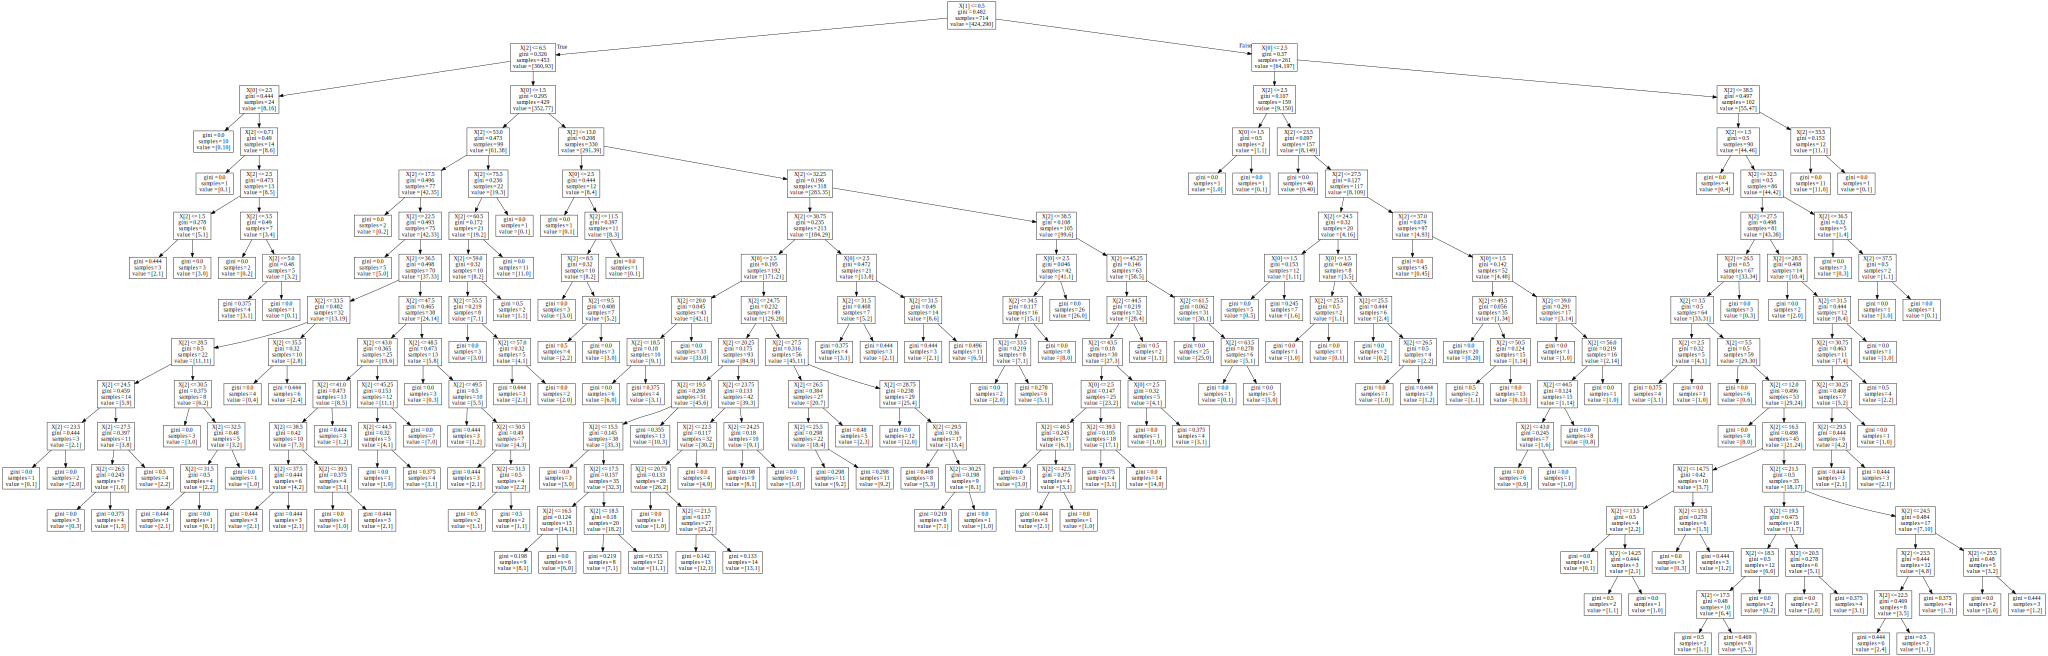

In [175]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
from sklearn.datasets import load_iris
iris = load_iris()
print iris.data.shape, X.shape
print iris.target.shape, Y.shape
X[X=='male'] = 0
X[X=='female'] = 1
# print X
# X[:,1] = np.astype(X[:,1], dtype=float) 
# clf = clf.fit(X, Y,)
idx = [i for i,x in enumerate(X[:,2]) if not math.isnan(x)]
print 'len',len(idx)
X = X[idx]
Y = Y[idx]
print X.shape, Y.shape

clf = clf.fit(X, Y,)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 


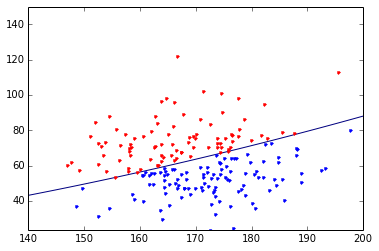

(200, 2)
(200, 2) (200,)


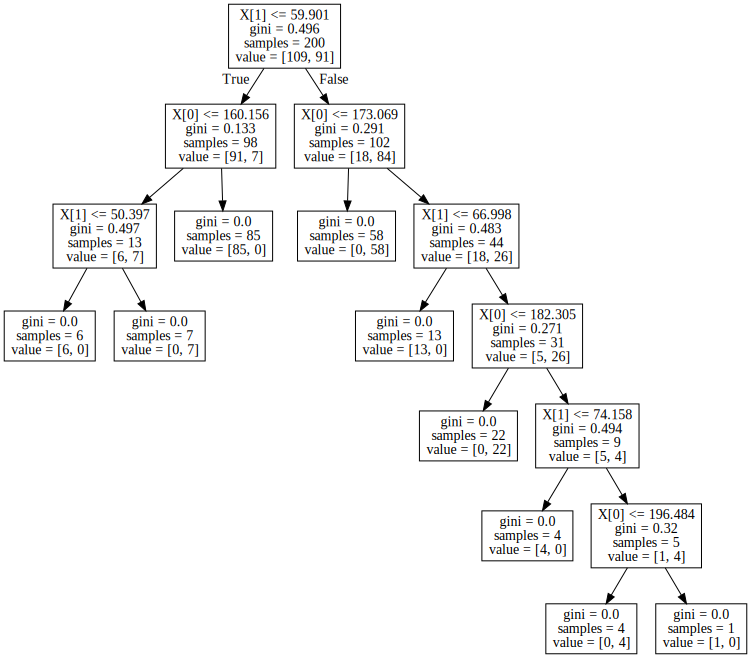

In [179]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.random.normal(170, 10,200)
y = np.random.normal(63, 15,200)
z = y / np.power( (x/100.), 2) - 22
idx1 = [i for i,zi in enumerate(z) if zi > 0 ]
idx2 = [i for i,zi in enumerate(z) if zi <= 0 ]

# plt.plot(x,y,'r.')
x1 = x[idx1]
y1 = y[idx1]
plt.plot(x1,y1,'r.')
x2 = x[idx2]
y2 = y[idx2]
plt.plot(x2,y2,'b.')

a=np.linspace(140,200,200)
b=np.linspace(30,150,200)

a, b = np.meshgrid(a,b)

label = [0] * ( len(x)*len(y))

c = b / np.power( (a/100.), 2) - 22

plt.contour(a, b, c,[0], linewidths=1, linetypes='-')

plt.show()


# 
# from sklearn import tree
X = np.swapaxes(np.vstack([x,y]), 0,1)
print X.shape
Y = np.asarray([1 if zi > 0 else 0 for zi in z])
print X.shape, Y.shape
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y,)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
graph



(40, 2) (40,)


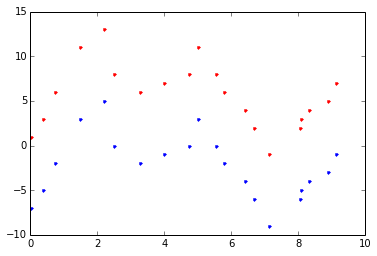

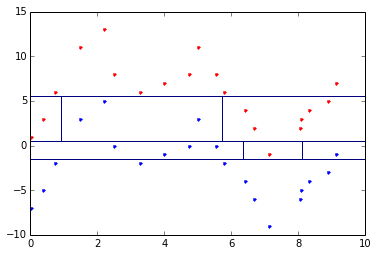

Accuracy = 63.15% (6315/10000) (classification)


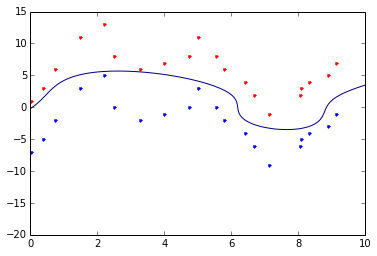

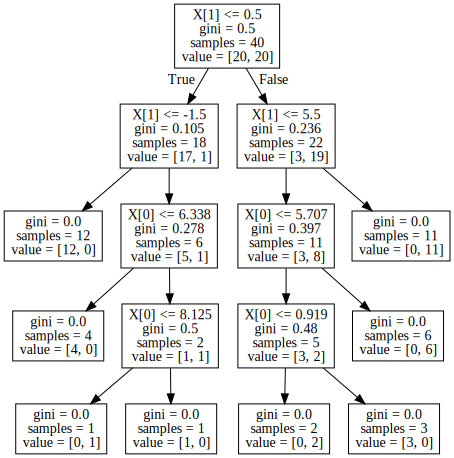

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from svm import *
from svmutil import *
%matplotlib inline
# x = np.random.normal(0, 20,200)
# y = np.random.uniform(0, 20,1000)
def getX(l):
    s = np.random.uniform(0, 1,l)
    a = 0
    x = []
    for i in s:
        a += i
        x.append(a)
    return x
def x0(h,f,t):
    a=np.linspace(0,10,200)
    b=np.linspace(f,t,200)
    a, b = np.meshgrid(a,b)
    c = a - h
    plt.contour(a, b, c,[0], linewidths=1, linetypes='r-')

def x1(h,f,t):
    a=np.linspace(f,t,200)
    b=np.linspace(-10,15,200)
    a, b = np.meshgrid(a,b)
    c = b - h
    plt.contour(a, b, c,[0], linewidths=1, linetypes='r-')
def plot_decision_func(m,x=np.linspace(-0.1,1,200), y=np.linspace(-8,2,200)):
    
    x, y = np.meshgrid(x,y)
    
    label = [0] * ( len(x)*len(y))
    p_labels, p_acc, p_vals = svm_predict(label, np.c_[x.ravel(),y.ravel()].tolist(), m)

    Z = np.asarray(p_vals).reshape(x.shape)

    contours = plt.contour(x, y, Z,[0], linewidths=1,
                   linetypes='g-')

c = a - 5.274
y1 = np.array([1,3,6,11,13,8,6,7,8,11,8,6,4,2,-1,2,3,4,5,7])
# x = getX(len(y1))
x = [0.007710753117419644, 0.36208700909838065, 0.7319336032574529, 1.4763962931088268, 2.1950753069284206, 2.4870744598149397, 3.2773760144360184, 3.9772588033655127, 4.726152357966271, 4.994647897787734, 5.55279627356714, 5.787737302121485, 6.41974897235535, 6.672024971599827, 7.123019127268268, 8.061156096984437, 8.088584158322323, 8.31310357138964, 8.875143078621559, 9.126061626863041]
# y = -0.000001*np.power(x,4) + 2*np.power(x,3) + np.power(x,3) + 100
# z = y / np.power( (x/100.), 2) - 22
# idx1 = [i for i,zi in enumerate(z) if zi > 0 ]
# idx2 = [i for i,zi in enumerate(z) if zi <= 0 ]
y2 = y1-8

# x1 = x[idx1]
# y1 = y[idx1]
# plt.plot(x1,y1,'r.')
# x2 = x[idx2]
# y2 = y[idx2]
from sklearn import tree
X = np.swapaxes(np.vstack([np.hstack([x,x]),np.hstack([y1,y2])]), 0,1)
Y = np.asarray([1 if i < len(y1) else 0 for i in range(X.shape[0])])
print X.shape, Y.shape

plt.plot(x,y1,'r.')
plt.plot(x,y2,'b.')
plt.show()

# 
plt.plot(x,y1,'r.')
plt.plot(x,y2,'b.')


x1(0.5,0,10)
x1(-1.5,0,10)
x0(6.338,-1.5,0.5)
x0(8.125,-1.5,0.5)

x1(5.5,0,10)
x0(5.707,0.5,5.5)
x0(0.919,0.5,5.5)
plt.show()

plt.plot(x,y1,'r.')
plt.plot(x,y2,'b.')


prob = svm_problem(Y.tolist(),X.tolist())
param = svm_parameter('-s 0 -t 1 -d 4 -r 80 -g 1 -c 1000000')
m = model = svm_train(prob, param)
plot_decision_func(m,np.linspace(0,10,100) ,np.linspace(-20,15,100))

plt.show()

# 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y,)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
graph



In [102]:
from svm import *
from svmutil import *
def plot_decision_func(m,x=np.linspace(-0.1,1,200), y=np.linspace(-8,2,200)):
    
    x, y = np.meshgrid(x,y)
    
    label = [0] * ( len(x)*len(y))
    p_labels, p_acc, p_vals = svm_predict(label, np.c_[x.ravel(),y.ravel()].tolist(), m)

    Z = np.asarray(p_vals).reshape(x.shape)

    contours = plt.contour(x, y, Z,[0], linewidths=1,
                   linetypes='-')


prob = svm_problem(Y.tolist(),X.tolist())
param = svm_parameter('-s 0 -t 0 -c 100 -h 0 ')
m = model = svm_train(prob, param)
plot_decision_func(m,np.linspace(0,10,100) ,np.linspace(-20,15,100))
    
#     An = [a[0] for a in m.get_sv_coef()]
    
#     SV = spase2dense(m.get_SV(), d=2)
    
#     b = -m.rho.contents.value


